# Лабораторная работа № 8

# Морозова Маргарита, РИ-481223

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import numpy.random as rand
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

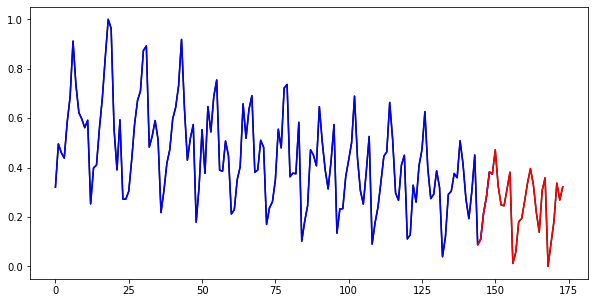

In [2]:
file = h5py.File(r'C:\Users\Морозова Маргарита\Downloads\Fort.mat')
data = file.get('Fort')
Fort = np.array(data)
F = Fort
scaler = MinMaxScaler(feature_range=(0, 1))
F = scaler.fit_transform(F)
F_tr = F[:150]
F_test = F[144:]
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:150],F_tr, 'b')
plt.plot(np.r_[144:174],F_test, 'r')
plt.show()

Произведем предобработку исходных данных в формат, понимаемый слоем LSTM-сети

In [3]:
from keras.preprocessing.sequence import TimeseriesGenerator
data_gen = TimeseriesGenerator(F_tr, F_tr,length=6, sampling_rate=1, batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

(144, 6, 1)
(144, 1, 6)
(144, 1)


Составим саму модель прогнозной сети

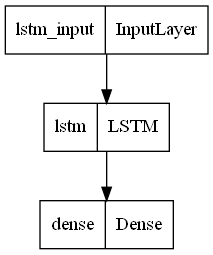

In [4]:
from keras.utils import plot_model
model = Sequential() # слои соединены последовательно
model.add(LSTM(units=20, input_shape=(1, 6))) # 20 нейронов
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
plot_model(model, to_file='model.png') # рисунок полученной сети

Модель из 3 слоев LSTM

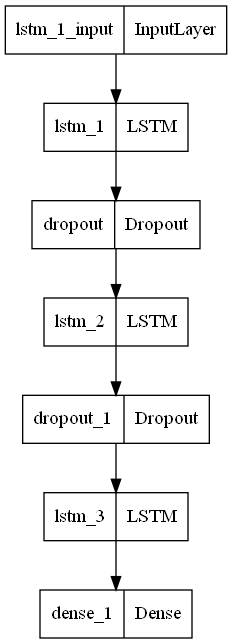

In [5]:
from keras.utils import plot_model
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(1, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=20, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=20))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
plot_model(model, to_file='model.png')

Производим обучение нашей модели

In [6]:
model.fit(xx, yy, epochs = 100) # 100 эпох по 144 точки

Epoch 1/100
5/5 [==============================] - 5s 5ms/step - loss: 0.2283
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2171
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2053
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1926
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1647
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1485
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1313
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1142
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0954
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0754
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0547
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

Чтобы посмотреть, что же у нас получилось обучить, построим ретроспективный прогноз, с переходом обратно к исходному масштабу данных:

5/5 [==============================] - 0s 3ms/step


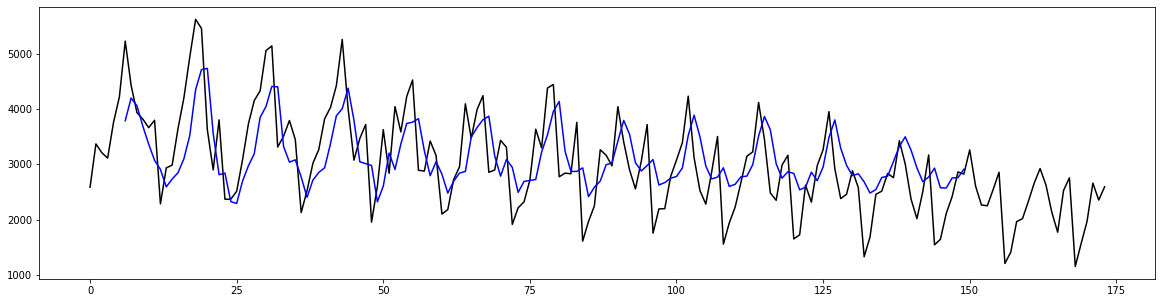

In [8]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (20, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[6:150],trainPredict, 'b')
plt.show()

Для тестовой проверки прогноза придется исходные точки вновь переработать в формат, понятный для модели LSTM-сети:

In [9]:
data_gen = TimeseriesGenerator(F_test, F_test,
 length=6, sampling_rate=1,
 batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) # прогноз на 24 точки по 6 наблюдениям
print(yy.shape) #

(24, 1, 6)
(24, 1)


Строим получившийся тестовый прогноз в нужном масштабе:

1/1 [==============================] - 0s 17ms/step


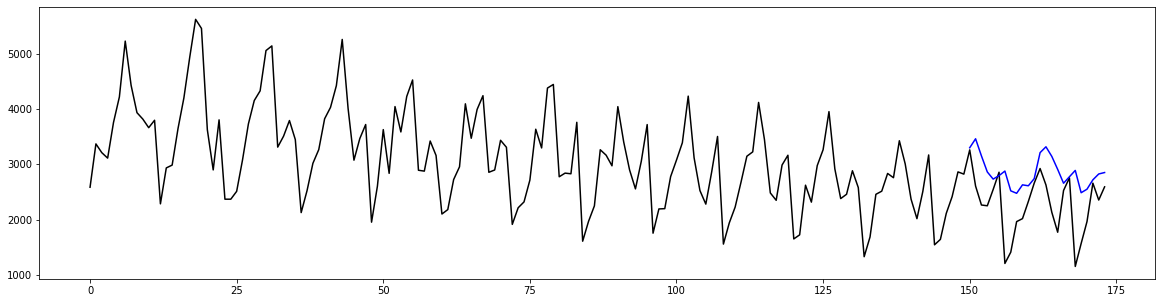

In [11]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (20, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[150:174],testPredict, 'b')
plt.show()

Самостоятельно попробуйте подобрать такую модель, чтобы получить наиболее удачный результат

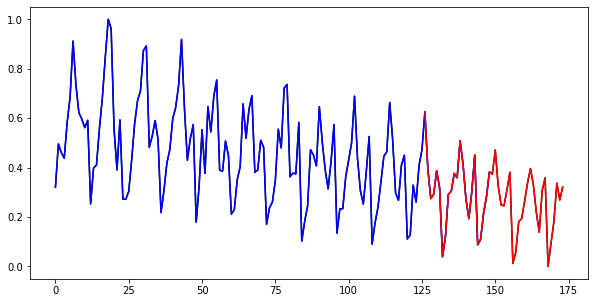

In [75]:
F_tr = F[:150]
F_test = F[126:]
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:150],F_tr, 'b')
plt.plot(np.r_[126:174],F_test, 'r')
plt.show()

In [76]:
from keras.preprocessing.sequence import TimeseriesGenerator 
data_gen = TimeseriesGenerator(F_tr, F_tr, length=24, sampling_rate=1, batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

(126, 24, 1)
(126, 1, 24)
(126, 1)


In [77]:
model = Sequential()
model.add(LSTM(units=40, return_sequences=True, input_shape=(1, 24))) # подобрали параметры
model.add(Dropout(0.5))
model.add(LSTM(units=40))
model.add(Dense(1, activation='relu'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [78]:
model.fit(xx, yy, epochs = 100) 

Epoch 1/100
4/4 [==============================] - 3s 5ms/step - loss: 0.1847
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1531
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1248
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0935
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0657
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0422
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0327
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0344
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0332
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0344
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0282
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0285
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

4/4 [==============================] - 1s 2ms/step


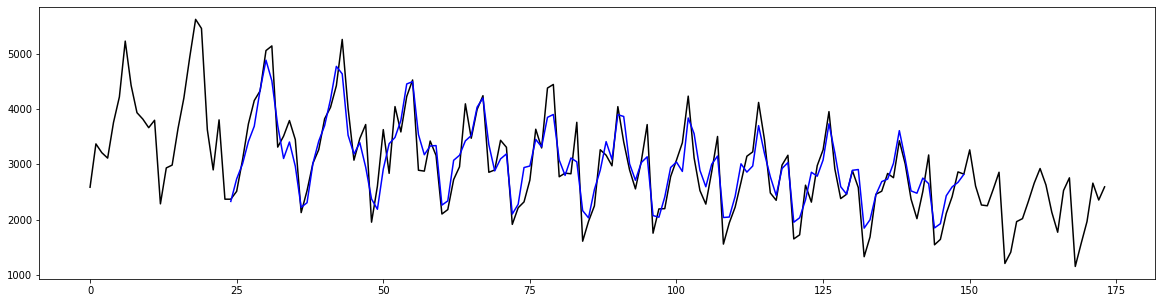

In [79]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (20, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[24:150],trainPredict, 'b')
plt.show()

In [80]:
data_gen = TimeseriesGenerator(F_test, F_test, length=24, sampling_rate=1, batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape)
print(yy.shape)

(24, 1, 24)
(24, 1)


1/1 [==============================] - 0s 16ms/step


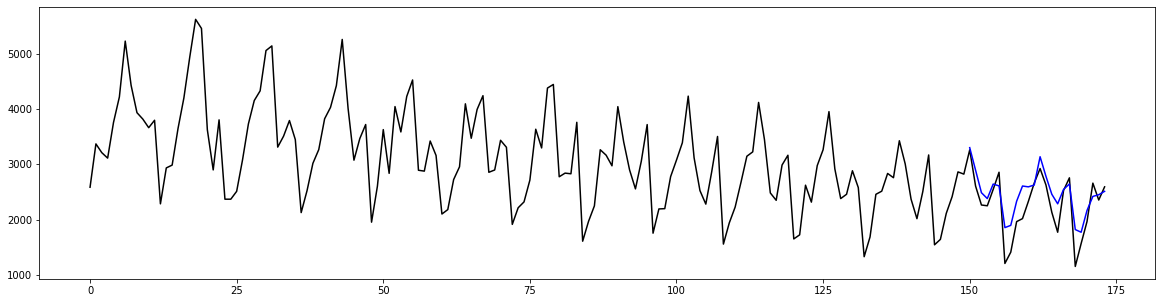

In [82]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (20, 5))
plt.plot(Fort, 'k')
plt.plot(np.r_[150:174],testPredict, 'b')
plt.show()

### Построем прогноз на 256 точек для следующего модельного временного ряда 

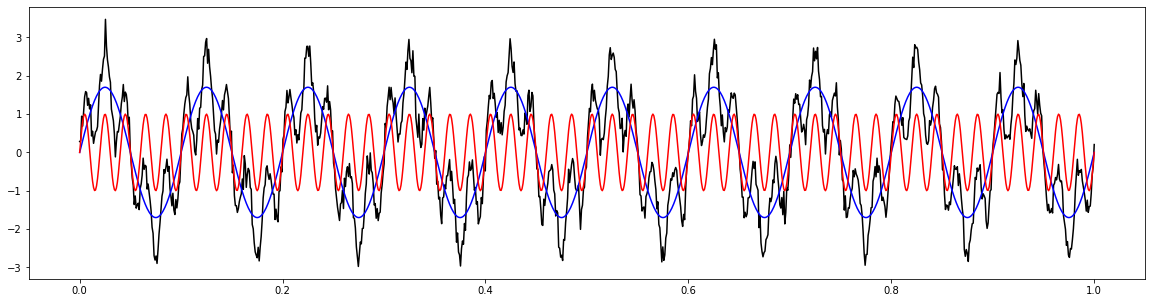

In [99]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F0=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()

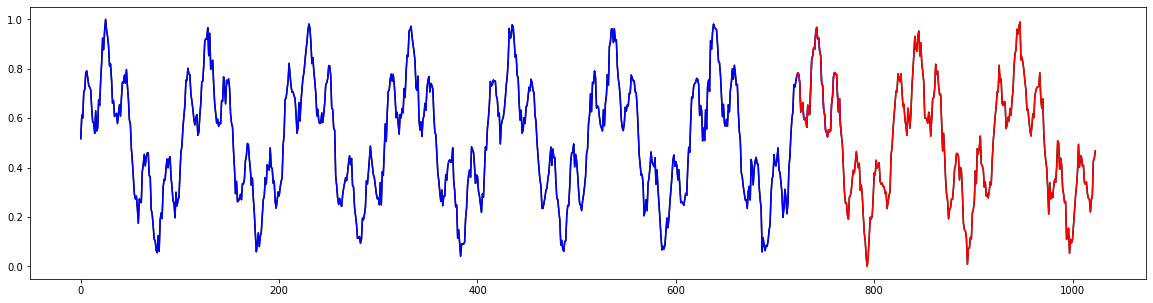

In [100]:
scaler = MinMaxScaler(feature_range=(0, 1))
F = scaler.fit_transform(F0.reshape(-1,1)) 
F_tr = F[:768]
F_test = F[722:]
plt.figure(figsize = (20, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:768],F_tr, 'b')
plt.plot(np.r_[722:1024],F_test, 'r')
plt.show()

In [101]:
data_gen = TimeseriesGenerator(F_tr, F_tr, length=46, sampling_rate=1, batch_size=768)
batch_0 = data_gen[0]
x, y = batch_0 
print(x.shape) 
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape)
print(yy.shape)

(722, 46, 1)
(722, 1, 46)
(722, 1)


In [102]:
model = Sequential()
model.add(LSTM(units=40, return_sequences=True, input_shape=(1, 46))) # подбор параметров
model.add(Dropout(0.5))
model.add(LSTM(units=40, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=40))
model.add(Dense(units = 1, activation='hard_sigmoid'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [103]:
model.fit(xx, yy, epochs = 100)

Epoch 1/100
23/23 [==============================] - 4s 6ms/step - loss: 0.0529
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0486
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0292
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0124
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 11/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 12/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 13/100
23/23 [=================

23/23 [==============================] - 0s 2ms/step


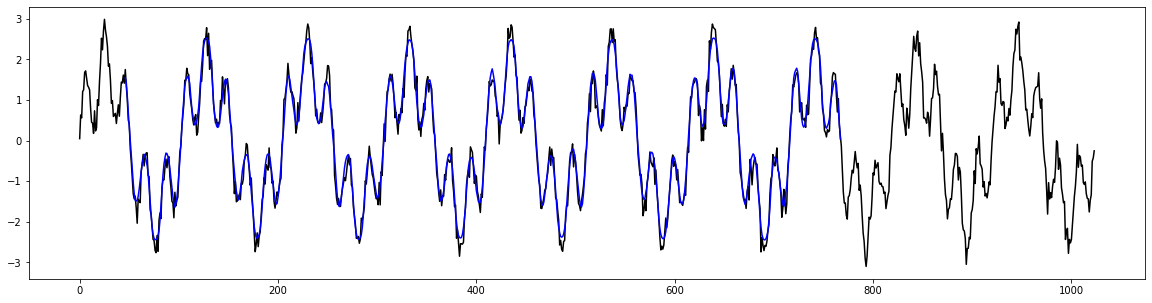

In [106]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (20, 5))
plt.plot(F0, 'k')
plt.plot(np.r_[46:768],trainPredict, 'b')
plt.show()

In [107]:
data_gen = TimeseriesGenerator(F_test, F_test, length=46, sampling_rate=1, batch_size=768)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) 
print(yy.shape)

(256, 1, 46)
(256, 1)


8/8 [==============================] - 0s 3ms/step


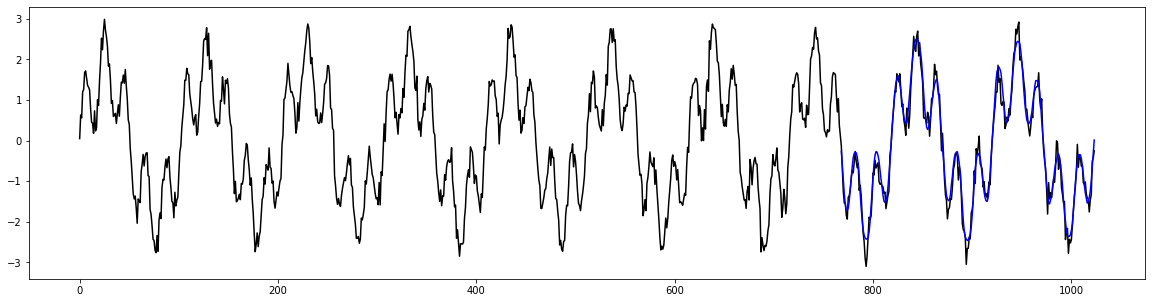

In [109]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (20, 5))
plt.plot(F0, 'k')
plt.plot(np.r_[768:1024],testPredict, 'b')
plt.show()

### Построим прогноз на 256 точек для следующего модельного временного ряда

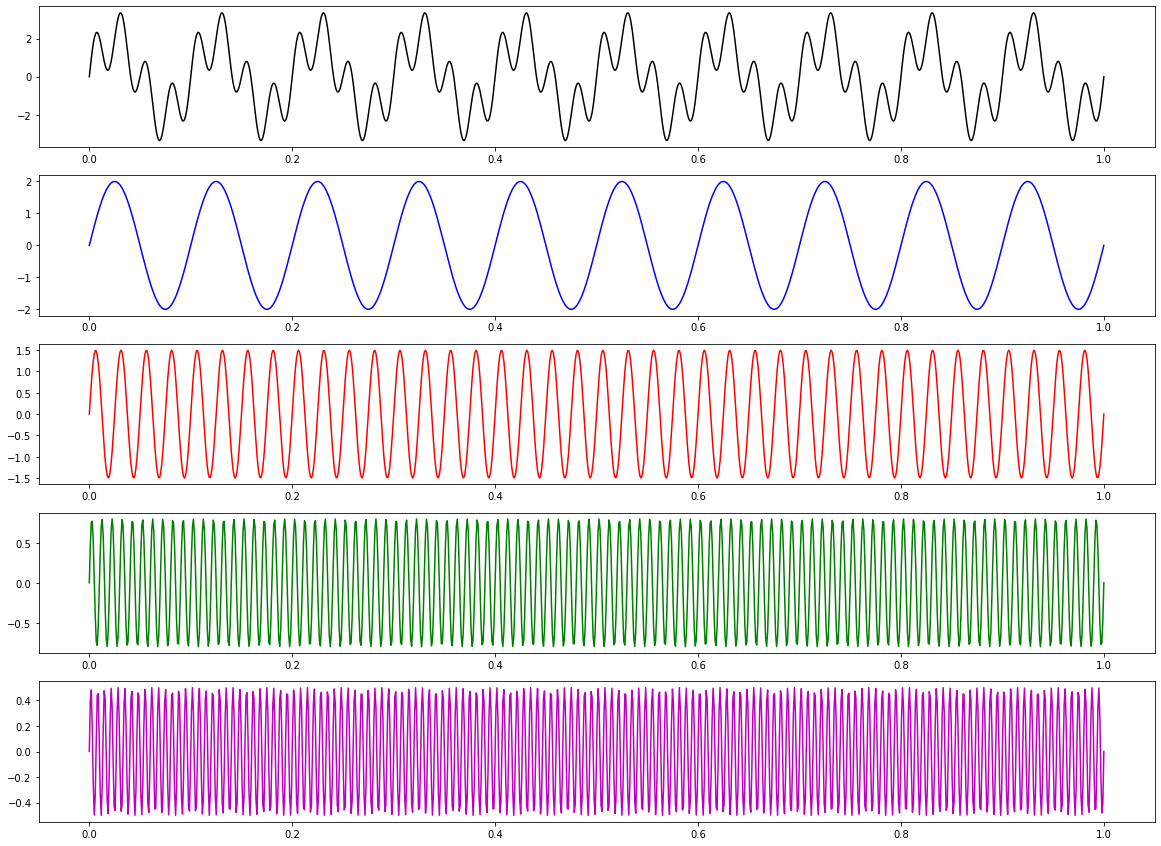

In [112]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F1=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)
+0.8*np.sin(2*np.pi*f3*t)
+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (20, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

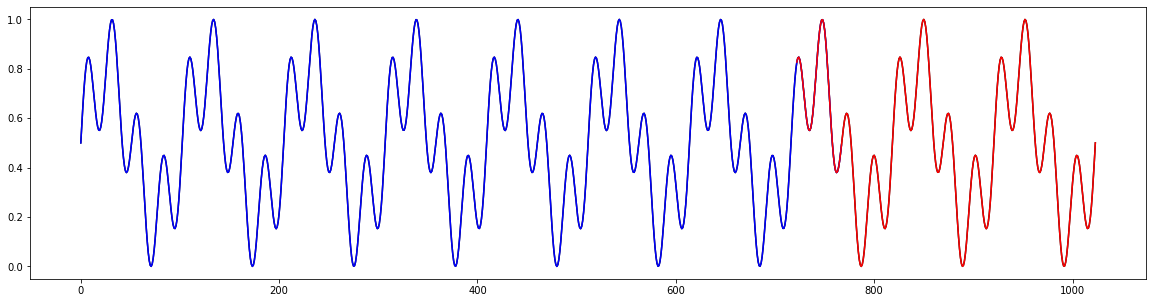

In [113]:
scaler = MinMaxScaler(feature_range=(0, 1))
F = scaler.fit_transform(F1.reshape(-1,1)) 
F_tr = F[:768]
F_test = F[722:]
plt.figure(figsize = (20, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:768],F_tr, 'b')
plt.plot(np.r_[722:1024],F_test, 'r')
plt.show()

In [114]:
data_gen = TimeseriesGenerator(F_tr, F_tr, length=46, sampling_rate=1, batch_size=768)
batch_0 = data_gen[0]
x, y = batch_0 
print(x.shape) 
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape)
print(yy.shape)

(722, 46, 1)
(722, 1, 46)
(722, 1)


In [115]:
model = Sequential()
model.add(LSTM(units=40, return_sequences=True, input_shape=(1, 46))) # подбор параметров
model.add(Dropout(0.5))
model.add(LSTM(units=40, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=40))
model.add(Dense(units = 1, activation='hard_sigmoid'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [116]:
model.fit(xx, yy, epochs = 100)

Epoch 1/100
23/23 [==============================] - 5s 6ms/step - loss: 0.0685
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0652
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0418
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 11/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 12/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 13/100
23/23 [=================

23/23 [==============================] - 1s 2ms/step


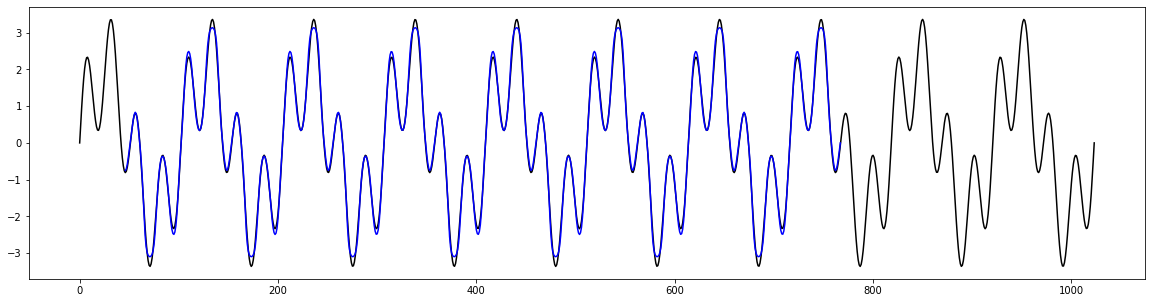

In [117]:
trainPredict = model.predict(xx)
trainPredict = scaler.inverse_transform(trainPredict)
plt.figure(figsize = (20, 5))
plt.plot(F1, 'k')
plt.plot(np.r_[46:768],trainPredict, 'b')
plt.show()

In [118]:
data_gen = TimeseriesGenerator(F_test, F_test, length=46, sampling_rate=1, batch_size=768)
batch_0 = data_gen[0]
x, y = batch_0
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy = y
print(xx.shape) 
print(yy.shape)

(256, 1, 46)
(256, 1)


8/8 [==============================] - 0s 3ms/step


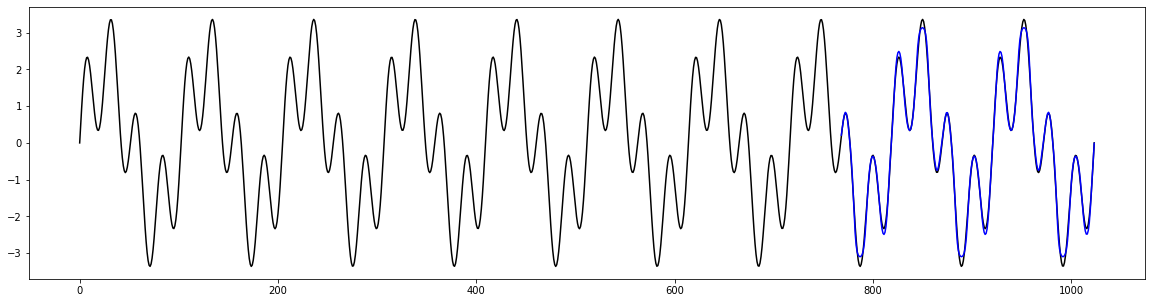

In [120]:
testPredict = model.predict(xx)
testPredict = scaler.inverse_transform(testPredict)
plt.figure(figsize = (20, 5))
plt.plot(F1, 'k')
plt.plot(np.r_[768:1024],testPredict, 'b')
plt.show()